# (Tut 0) ML/DL Pre-flight 

In [1]:
%system top -b -n 1 | grep Cpu
%system free -m

['              total        used        free      shared  buff/cache   available',
 'Mem:          12982         617        9801           1        2563       12085',
 'Swap:             0           0           0']

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

## Load your data

In [4]:
from sklearn.metrics import log_loss

In [5]:
import warnings
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.exceptions import ConvergenceWarning
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

# Load data from https://www.openml.org/d/554
X, y = fetch_openml(
    "mnist_784", version=1, return_X_y=True, as_frame=False, parser="pandas"
)
X = X / 255.0


In [6]:
np.shape(X)

#np.unique(y)

(70000, 784)

In [7]:
import sys

print("Size of X: {} MB".format(sys.getsizeof(X)/(10**6)))
print("Size of y: {} MB".format(sys.getsizeof(y)/(10**6)))

Size of X: 439.040128 MB
Size of y: 0.560112 MB


In [8]:
def plot_rand_digit(X,y):
    tmp_indx = np.random.randint(len(X))
    image_data = np.reshape(X[tmp_indx],(28, 28))
    plt.imshow(image_data, cmap='gray')
    plt.colorbar()
    plt.show()
    print("extracted index: ", tmp_indx)
    print("label is: ",y[tmp_indx])
    return image_data,X[tmp_indx]

def plot_digit(tmp_indx, X,y):
    image_data = np.reshape(X[tmp_indx],(28, 28))
    plt.imshow(image_data, cmap='gray')
    plt.colorbar()
    plt.show()
    print("label is: ",y[tmp_indx])
    return image_data,X[tmp_indx]

def plot_image(image_data):
    plt.imshow(image_data, cmap='gray')
    plt.colorbar()
    plt.show()

def image_2_X(tmp_image):
    return tmp_image.reshape(28*28,)

In [51]:
#uncomment
#tmp_image, tmp_imX = plot_rand_digit(X,y)

In [10]:
# Split data into train partition and test partition
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.3)

In [11]:
mlp = MLPClassifier(
    hidden_layer_sizes=(40,),
    max_iter=4,
    alpha=1e-4,
    solver="sgd",
    verbose=1,
    random_state=1,
    learning_rate_init=0.2,
)

#with warnings.catch_warnings():
#    warnings.filterwarnings("ignore", category=ConvergenceWarning, module="sklearn")
    
mlp.fit(X_train, y_train)

print("Training set score: %f" % mlp.score(X_train, y_train))
print("Test set score: %f" % mlp.score(X_test, y_test))

Iteration 1, loss = 0.30763959
Iteration 2, loss = 0.14463751
Iteration 3, loss = 0.11186542
Iteration 4, loss = 0.09615766


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (4) reached and the optimization hasn't converged yet.
  warnings.warn(


Training set score: 0.975184
Test set score: 0.961952


In [14]:
# N.b.:
print(np.shape(mlp.predict_proba(X[0].reshape(-1,1).T)))

(1, 10)


## Plot the learning curve

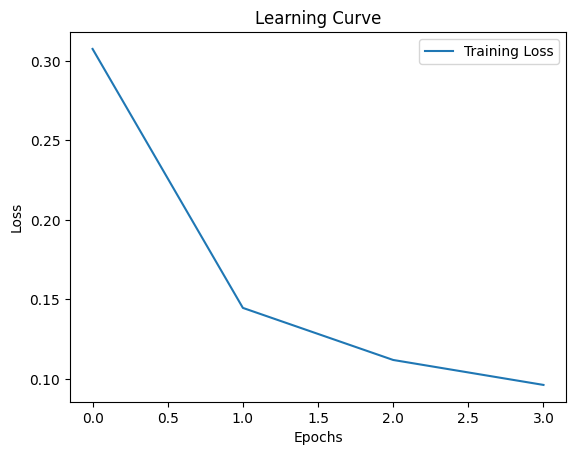

In [13]:
# Plot the learning curve
plt.plot(mlp.loss_curve_, label="Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Learning Curve")
plt.show()

In [15]:
mlp = MLPClassifier(
    hidden_layer_sizes=(40,),
    max_iter=1,
    alpha=1e-4,
    solver="sgd",
    verbose=1,
    random_state=1,
    learning_rate_init=0.2,
    warm_start=True,  # Keep the learned weights between partial_fit calls
    batch_size=200
)

num_epochs = 10
train_loss = []
test_loss = []

for epoch in range(num_epochs):
    mlp.partial_fit(X_train, y_train, classes=np.unique(y))
    train_loss.append(log_loss(y_train, mlp.predict_proba(X_train)))
    test_loss.append(log_loss(y_test, mlp.predict_proba(X_test)))

print("Training set score: %f" % mlp.score(X_train, y_train))
print("Test set score: %f" % mlp.score(X_test, y_test))


Iteration 1, loss = 0.30763959
Iteration 2, loss = 0.14127103
Iteration 3, loss = 0.11035624
Iteration 4, loss = 0.09344541
Iteration 5, loss = 0.08102296
Iteration 6, loss = 0.07178889
Iteration 7, loss = 0.06375451
Iteration 8, loss = 0.05863240
Iteration 9, loss = 0.05515901
Iteration 10, loss = 0.04981513
Training set score: 0.981143
Test set score: 0.964476


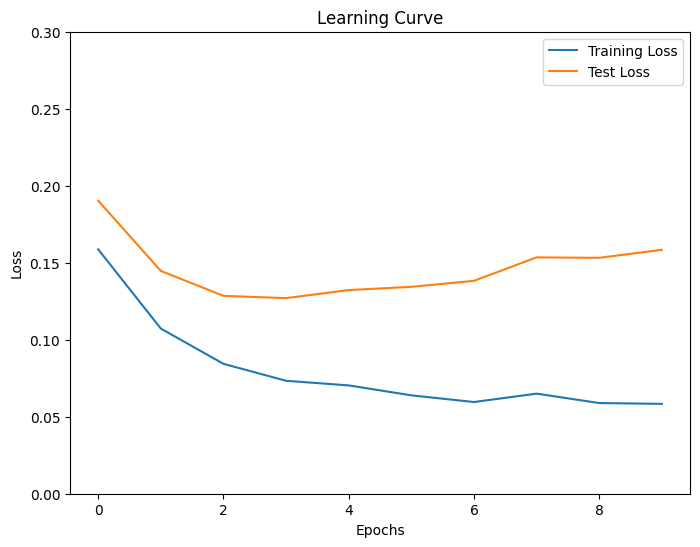

In [16]:
plt.rcParams["figure.figsize"] = (8,6)


# Plot the learning curve
plt.plot(train_loss, label="Training Loss")
plt.plot(test_loss, label="Test Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.ylim(0.,0.3)
plt.legend()
plt.title("Learning Curve")
plt.show()


In [17]:
mlp = MLPClassifier(
    hidden_layer_sizes=(40,),
    max_iter=1,
    alpha=1e-4,
    solver="sgd",
    verbose=1,
    random_state=1,
    learning_rate_init=0.2,
    warm_start=True,  # Keep the learned weights between partial_fit calls
    batch_size=200
)

num_epochs = 3
train_loss = []
test_loss = []

for epoch in range(num_epochs):
    mlp.partial_fit(X_train, y_train, classes=np.unique(y))
    train_loss.append(log_loss(y_train, mlp.predict_proba(X_train)))
    test_loss.append(log_loss(y_test, mlp.predict_proba(X_test)))

print("Training set score: %f" % mlp.score(X_train, y_train))
print("Test set score: %f" % mlp.score(X_test, y_test))

Iteration 1, loss = 0.30763959
Iteration 2, loss = 0.14127103
Iteration 3, loss = 0.11035624
Training set score: 0.974327
Test set score: 0.963095


## Representation of your neural network

In [18]:
!pip install nnv

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [49]:
from nnv import NNV

plt.rcParams["figure.figsize"] = (200,10)

layersList = [
    {"title":"input\n", "units": 784, "color": "darkBlue"},
    {"title":"hidden \n(relu)", "units": 40},
    {"title":"output\n(softmax)", "units": 10,"color": "darkBlue"},
]

#NNV(layersList, max_num_nodes_visible=40, node_radius=5, spacing_layer=200, font_size=12).render(save_to_file="my_example_2.pdf")

## Provide a representation of the neurons of your network

In [21]:
print(np.shape(mlp.coefs_[0].T), np.shape(mlp.intercepts_[0].T))
print(np.shape(mlp.coefs_[1].T), np.shape(mlp.intercepts_[1].T))

(40, 784) (40,)
(10, 40) (10,)


In [24]:
mlp.coefs_[0].min()

-1.0110948061139695

In [48]:
plt.rcParams["figure.figsize"] = (8.0,6.0)

#uncomment
#fig, axes = plt.subplots(5, 8)


# use global min / max to ensure all weights are shown on the same scale
vmin, vmax = mlp.coefs_[0].min(), mlp.coefs_[0].max()

max_abs = np.max([np.abs(vmin), np.abs(vmax)])

for coef, ax in zip(mlp.coefs_[0].T, axes.ravel()):
    #---matshow is used to display a matrix as an image
    #uncomment
    #im = ax.matshow(coef.reshape(28, 28), cmap=plt.cm.plasma, vmin=-max_abs, vmax=max_abs)
    ax.set_xticks(())
    ax.set_yticks(())

    
# Add a colorbar to the figure
#cbar = fig.colorbar(im, ax=axes.ravel().tolist())

plt.show()



In [32]:
print(vmin, vmax)

-1.0110948061139695 0.5733018937205047


In [ ]:
#--- checks

In [ ]:
#https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html
#coefs_: list of shape (n_layers - 1,)
#The ith element in the list represents the weight matrix corresponding to layer i.
np.shape(mlp.coefs_[0])

(784, 40)

In [ ]:
len(mlp.coefs_[0][783])

40

In [ ]:
np.shape(mlp.coefs_[1])

(40, 10)

In [ ]:
#intercepts_: list of shape (n_layers - 1,)
#The ith element in the list represents the bias vector corresponding to layer i + 1.
print(np.shape(mlp.intercepts_[0]))
mlp.intercepts_[0]

(40,)


array([-0.15575706, -0.15400826,  0.06508577,  0.49742375, -0.07005818,
       -0.10096713,  0.00309142,  0.05769386, -0.05570244, -0.02218003,
       -0.04044906, -0.03663522,  0.12771604,  0.3598094 , -0.10272782,
       -0.11523947,  0.02937951, -0.12281815,  0.12459668,  0.25668712,
        0.21835264,  0.12890185, -0.03186991, -0.09561   ,  0.22223194,
       -0.17703044, -0.09829197, -0.31367624,  0.00655406,  0.1949957 ,
        0.30697201,  0.02098709,  0.19564065,  0.14785048, -0.09733604,
        0.042845  ,  0.01779155, -0.14027736, -0.10658419,  0.39470569])

In [ ]:
np.shape(mlp.intercepts_[1])

(10,)

## Let's make predictions


In [34]:
# uncomment the following

#tmp_image, tmp_imX = plot_rand_digit(X,y)

In [35]:
#mlp.predict(tmp_imX.reshape(-1,1).T)


In [36]:
###################
# index 7560 ---> 2 
# index 7561 ---> 9
###################

#tmp_image, tmp_imX = plot_digit(7561,X_test,y_test)

In [37]:
#mlp.predict(tmp_imX.reshape(-1,1).T)

In [38]:
# Rotate the array by 90 degrees
#rotated_image = np.rot90(tmp_image)
#rotated_image = np.rot90(rotated_image)

In [39]:
#plot_image(rotated_image)

In [40]:
#tmp_X = image_2_X(rotated_image)

In [41]:
#mlp.predict(tmp_X.reshape(-1,1).T)

## Let's represent in a dimensionally reduced space

In [ ]:
!pip install plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
#dred = TSNE()
dred = PCA(n_components = 3)


In [ ]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import plotly.express as px
import plotly.io as pio

# Save the plot as an HTML file

def plot_3d_pca(X, y, target_names=None):
    # Apply PCA with 3 components
    pca = PCA(n_components=3)
    X_pca = pca.fit_transform(X)

    # Combine the PCA results and target labels
    data = np.column_stack((X_pca, y))

    # Create a DataFrame with column names
    columns = ['PC1', 'PC2', 'PC3', 'label']
    df = pd.DataFrame(data, columns=columns)
    df['label'] = df['label'].astype(int)
    
    if target_names is not None:
        df['label_name'] = df['label'].apply(lambda x: target_names[x])
        color_col = 'label_name'
    else:
        color_col = 'label'

    # Create the interactive 3D plot
    fig = px.scatter_3d(df, x='PC1', y='PC2', z='PC3', color=color_col, symbol=color_col, text=color_col,
                        labels={'PC1': 'Principal Component 1', 'PC2': 'Principal Component 2', 'PC3': 'Principal Component 3'})

    # Customize the plot appearance
    fig.update_layout(
        margin=dict(l=0, r=0, t=0, b=0),
        scene=dict(
            xaxis_title='Principal Component 1',
            yaxis_title='Principal Component 2',
            zaxis_title='Principal Component 3',
        ),
    )

    # Show the plot
    #fig.show()
    #pio.write_html(fig, file="./3d_pca_plot.html", auto_open=True)

    
    return fig

    
    
    

In [43]:
#uncomment the following
#fig = plot_3d_pca(X_test, y_test, ['0','1','2','3','4','5','6','7','8','9']) 

#fig.show()

In [ ]:
!pwd

/content
